In [67]:
%load_ext autoreload
%autoreload 2

from Openseas_Methods import pull_sales_data,make_graph,make_nft_graph,pull_nft_stats,edge_counts_to_percent
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import pygraphviz
import random
from pymongo import MongoClient
from tqdm import tqdm
import pandas as pd
from itertools import combinations
from collections import defaultdict
import ast

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [176]:
#Finds all transaction hashes for sales

client = MongoClient()
db =client.NFTDB
sales_data = db.salesCollection
transfers = db.transfersCollection
WallettoNFT = db.addresstoNFT
combos_data = db.nftCombinations
skip_list=['ens','base-introduced','fundrop-pass','gemesis','apecoin','dai-stablecoin','uniswap','1inch-token']

In [51]:
 results = combos_data.find_one({})
print(combos_data.count_documents({}))

25314510


In [52]:
print(results)

{'_id': "('azukielementals', 'uniswap-v3-positions')", 'value': 195}


In [68]:

combos_50=combos_data.find({'value': {'$gt': 50}})
combos_50_dict = {ast.literal_eval(x['_id']):x['value'] for x in list(combos_50)}
# combos_50[('uniswap-v3-positions', 'azukielementals')]

In [110]:
combo_perc = edge_counts_to_percent(list(combos_50_dict.items()),minimum=False)

In [72]:
print(list(combo_perc.items())[0])

(('azukielementals', 'uniswap-v3-positions'), 0.03862916006339144)


In [73]:
print(len(combo_perc))

497918


In [119]:
with open('combo_per.pkl','rb') as f:
   combo_perc =  pickle.load(f)

In [171]:
combo_15_perc = {key:val for key, val in combo_perc.items() if val >0.3}

In [164]:
print(len(combo_15_perc))

8544


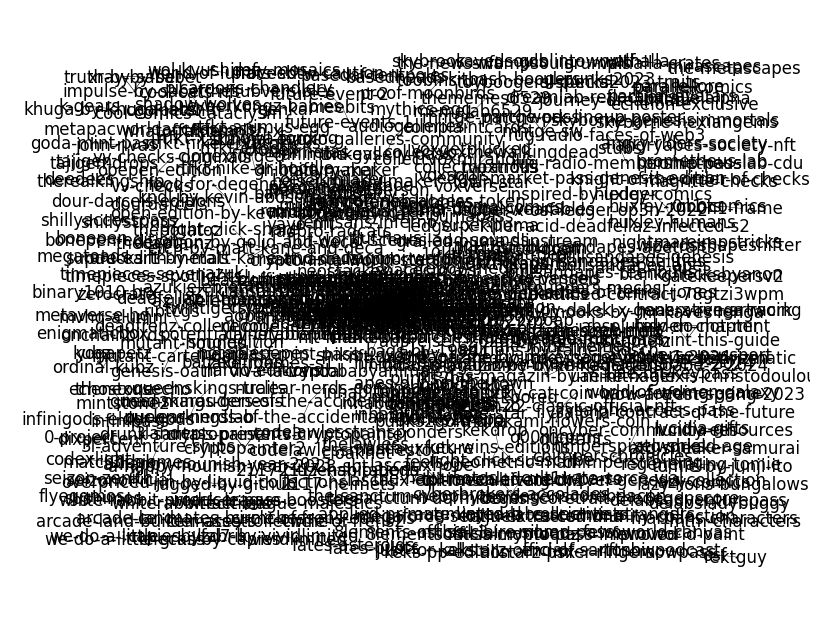

In [183]:

G = make_nft_graph(list(combo_15_perc.items()),skip_list=skip_list,min_owners=500)
plt.figure(figsize=(8,6))
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos =  nx.nx_agraph.graphviz_layout(G, prog="neato")
# draw graph
nx.draw(
    G, pos,
    # nodes
    node_size=2, node_color='k', linewidths=0, with_labels = True,# (linewidths of node markers)
    # edges
    edgelist = edges,
    width=weights

)

# draw disconnected DSPs in red
# nx.draw_networkx_nodes(
#     G, pos, nodelist=disconnected,
#     node_size=2, node_color='r', linewidths=0, 
# )
# nx.draw_networkx_labels(
#     G, pos,
#     labels={dsp: dsp for dsp in disconnected}, font_size=3, verticalalignment='bottom', font_color='r'
# )
plt.show()

['cryptoninjapartners-v2', 'metabatch', 'ikhy-museum', 'llac-marketing-seminar-jan-25-2023', 'kamiyo', 'kizuna-by-startjpn', 'n-pass-premium', 'wafukugen', 'cal-cryptoninja-shurikennft-beforestaking', 'cryptoninja-world-startjpn', 'spacecrocos', 'the-mafia-animals-soldiers-', 'panda-no-moto', 'cnp-makimono', 'cnp-charm-official', 'sattvasoulsupportersgoldensbt', 'mad-member-pass-reservation-sbt', 'cryptoninja-holiday', 'tolpass', 'wanokuni', 'aopanda-party-sbt-memorial', 'cnpp-legendary-members', 'shikibu-world', 'cryptofantasy-chapter1', 'cncsbt', 'neostackey', 'hitodumadao-cnpbaby', 'startland-reservation-sbt', 'musubicollection', 'matatabi-club-membership', 'pixelheroesvillains', 'panlo-by-startph', 'live-like-a-cat-mint-sbt', 'ikehaya-pass', 'cnp-prince-for-princess', 'app-enjoy-passport', 'cryptoninja-children', 'cryptoninjapartners', 'cnp-gotouchi', 'chimney-town-dao', 'crypto-japan-agri', 'bluechip-genesis-', 'kiyoshi-ujuuna', 'spacecrocos-episode2', 'sattva-soul-supporters-gene

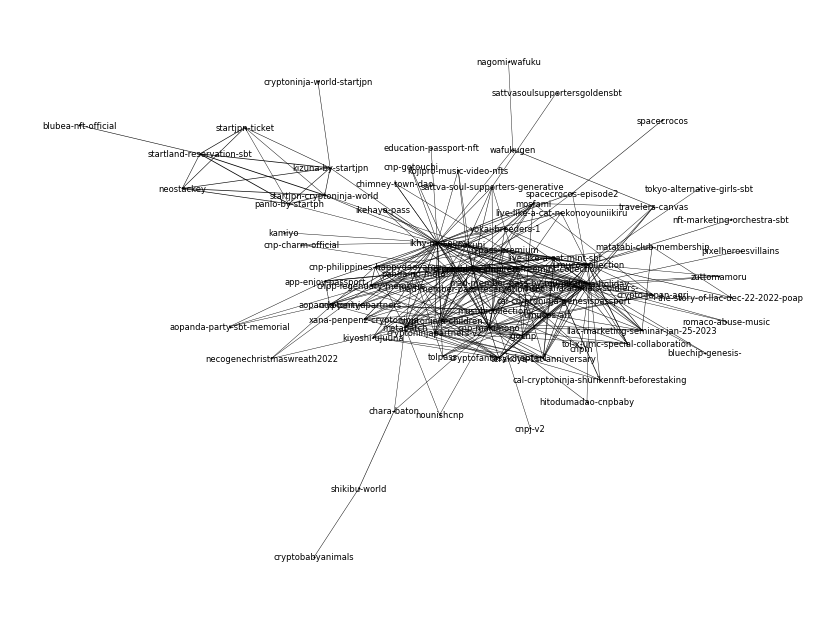

In [187]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
plt.figure(figsize=(8,6))
edges,weights = zip(*nx.get_edge_attributes(G0,'weight').items())
pos =  nx.nx_agraph.graphviz_layout(G0, prog="neato")
# draw graph
nx.draw(
    G0, pos,
    # nodes
    node_size=2, node_color='k', linewidths=0, with_labels = True,font_size=6,# (linewidths of node markers)
    # edges
    edgelist = edges,
    width=weights

)
print(G0.nodes())


23
['mfer-ringers', 'danks-2', 'boombix', 'life-death-cryptoart-no-5-reylarsdam', 'onchainmfersplayground', 'life-death-cryptoart-no-4-nadiia-forkosh', 'stammemes', 'life-death-cryptoart-no-2-pop-wonder', 'creyzies', 'nakavoxels-by-voxelqueen', 'creyzietoons', 'dank-editions', 'sartocrates-editions', 'amfers', 'life-death-cryptoart-no-6-sauce-k', 'life-death-cryptoart-no-3-pixelord', 'mfers', 'nakamigos', 'migos-labs', 'life-death-cryptoart-no-1-patrick-amadon', 'raremfers', 'eos-the-visitor-by-rabidartwork', 'end-of-sartoshi']


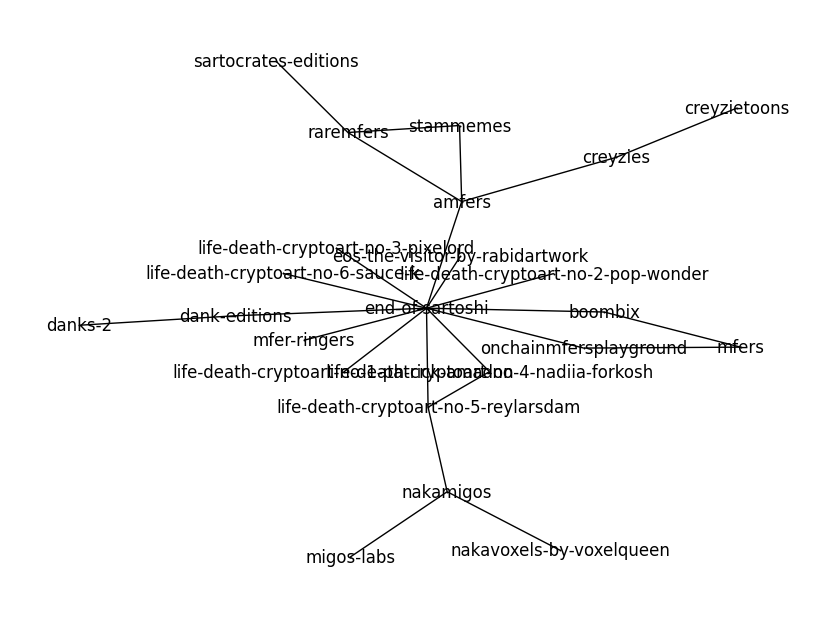

In [156]:
Gcc = nx.node_connected_component(G, 'nakamigos')
print(len(Gcc))
G0 = G.subgraph(Gcc)
print(G0.nodes())
plt.figure(figsize=(8,6))
# edges,weights = zip(*nx.get_edge_attributes(G0,'weight').items())
# print(weights)
pos =  nx.nx_agraph.graphviz_layout(G0, prog="neato")
# draw graph
nx.draw(
    G0, pos,
    # nodes
    node_size=2, node_color='k', linewidths=0, with_labels = True,# (linewidths of node markers)
    # edges
    # edgelist = edges

)

In [188]:
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G0)
net.show('test.html')

test.html
